<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/tamim_cnn_model_final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
test_dir="/content/drive/MyDrive/CovidDataset/Test"
train_dir="/content/drive/MyDrive/CovidDataset/Train"
val_dir="/content/drive/MyDrive/CovidDataset/Val"

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import optimizers
from keras.callbacks import History 
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    # rotation_range=20,
     #width_shift_range=0.1,
    # shear_range=0.1,
     zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [4]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=32, 
                                            shuffle=True, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

validation =image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='categorical',
                                                target_size=(224, 224))

test =image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

Found 8376 images belonging to 3 classes.
Found 2792 images belonging to 3 classes.
Found 2790 images belonging to 3 classes.


In [5]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
# model.add(Dense(64,activation='relu'))

model.add(Dense(3,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [9]:

r = model.fit(
    train, 
    epochs=20,
    validation_data=validation,
    validation_steps=100,
)

Epoch 1/20
262/262 [==============================] - 2832s 11s/step - loss: 0.6840 - accuracy: 0.6833 - val_loss: 0.2744 - val_accuracy: 0.9100
Epoch 2/20
262/262 [==============================] - 142s 542ms/step - loss: 0.3274 - accuracy: 0.8634 - val_loss: 0.2872 - val_accuracy: 0.9200
Epoch 3/20
262/262 [==============================] - 142s 544ms/step - loss: 0.2508 - accuracy: 0.9012 - val_loss: 0.3614 - val_accuracy: 0.8500
Epoch 4/20
262/262 [==============================] - 140s 534ms/step - loss: 0.2058 - accuracy: 0.9230 - val_loss: 0.1880 - val_accuracy: 0.9500
Epoch 5/20
262/262 [==============================] - 139s 531ms/step - loss: 0.1904 - accuracy: 0.9265 - val_loss: 0.3041 - val_accuracy: 0.8900
Epoch 6/20
262/262 [==============================] - 140s 534ms/step - loss: 0.1609 - accuracy: 0.9416 - val_loss: 0.2237 - val_accuracy: 0.9100
Epoch 7/20
262/262 [==============================] - 139s 530ms/step - loss: 0.1427 - accuracy: 0.9447 - val_loss: 0.2163 - 

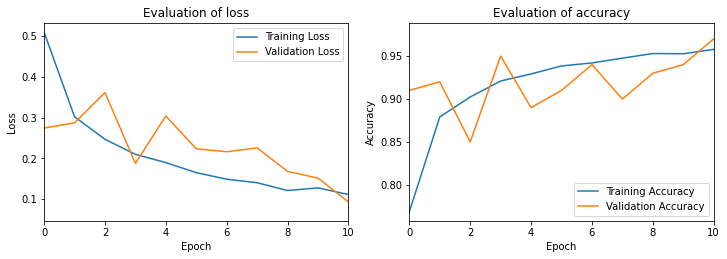

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Training Loss',scalex=True)
plt.plot(r.history['val_loss'], label='Validation Loss',scalex=True)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.xlim(0,10)
plt.legend()
plt.title('Evaluation of loss')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xlim(0,10)
plt.legend()
plt.title('Evaluation of accuracy')
plt.savefig("squares.png")

In [26]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

2790/2790 [==============================] - 690s 247ms/step - loss: 0.2659 - accuracy: 0.9265
Test Accuracy: 92.65%
262/262 [==============================] - 130s 495ms/step - loss: 0.0580 - accuracy: 0.9778
Train Accuracy: 97.78%


In [27]:
from keras.utils.np_utils import to_categorical 
num_classes=len(test.class_indices)

test_labels = test.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes) 
test_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

# rounded_labels=np.argmax(test, axis=1)

pred = model.predict(test)
# pred = np.argmax(predictions, axis=1)

y_pred=np.argmax(pred, axis=1)
y_test=np.argmax(test_labels, axis=1)


cnf_matrix=confusion_matrix(y_test, y_pred)
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,0,1,2,accuracy,macro avg,weighted avg
precision,0.902736,0.908696,0.971687,0.926523,0.927706,0.927706
recall,0.958065,0.898925,0.922581,0.926523,0.926523,0.926523
f1-score,0.929577,0.903784,0.946498,0.926523,0.926620,0.926620
support,930.000000,930.000000,930.000000,0.926523,2790.000000,2790.000000


In [34]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[891  27  12]
 [ 81 836  13]
 [ 15  57 858]]


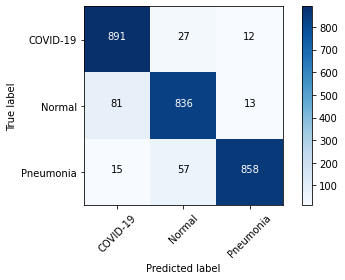

In [35]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COVID-19', 'Normal', 'Pneumonia'])
plt.savefig("CNN_CONFUTIONMATRIX1.png")

In [36]:
model.save('tamim_cnn_model_final_1.h5')